# Lab 12 pt 2: Kepler Orbits

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib osx

In [2]:
ms = 3e+6
mp = 1
G  = 1e-6

In [3]:
# initial positions
r = np.array([1, 0])

# initial velocities
v = np.array([0, 2]);

In [4]:
t = 0
tMax = 100.0
dt   = 0.001;
n    = tMax / dt

In [5]:
xt = []
yt = []
vxy = []
vyt = []
kint = []
pott = []
et = []
tt = []

In [6]:
def KeplerODE(t,y):
    global mp,ms,G

    r = y[0:2]
    v = y[2:4]
    
    drdt = v 

    F    = - ms * mp * G / np.linalg.norm(r)**3 * r
    a    = F / mp
    dvdt = a
    
    return np.concatenate((drdt,dvdt))

In [7]:
y = np.concatenate((r,v))
print(y.shape)
while (t<tMax):
    r = y[0:2]
    v = y[2:4]
    

    kin = 1.0/2.0*mp* np.linalg.norm(v)**2   #kinetic energy
    pot = -mp*ms*G / np.linalg.norm(r)     #potential energy
    e   = kin+pot
    #if (t==0.0):
    #    e0 = e
    #print(t,e,e0,e-e0)
    
    xt.append(r[0])
    yt.append(r[1])
    kint.append(kin)
    pott.append(pot)   #gravitational potential
    et.append(e)
    tt.append(t)
    
#     dydt = KeplerODE(t,y)
#     y = y + dydt*dt                        #Eulers method

    f1 = KeplerODE(t       ,y          )     #Runge Kutta Method
    f2 = KeplerODE(t+dt/2.0,y+f1*dt/2.0)
    f3 = KeplerODE(t+dt/2.0,y+f2*dt/2.0)
    f4 = KeplerODE(t+dt    ,y+f3*dt    )

    y = y + (f1 + 2.0*f2 + 2.0*f3 + f4) / 6.0 * dt
    t = t + dt
    


(4,)


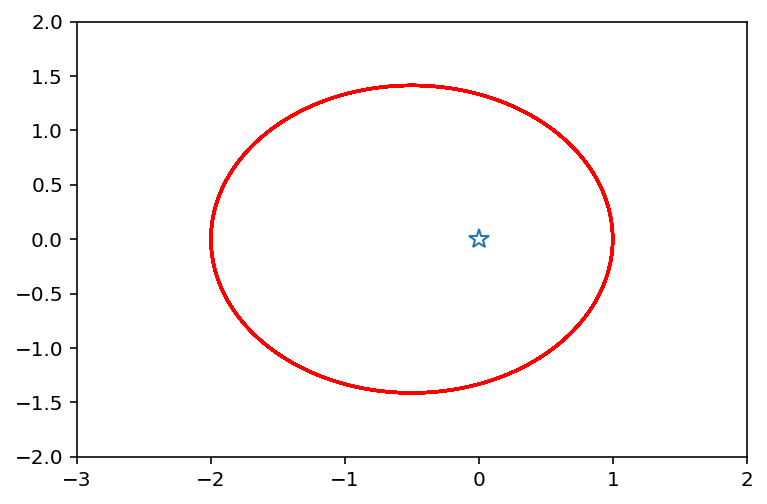

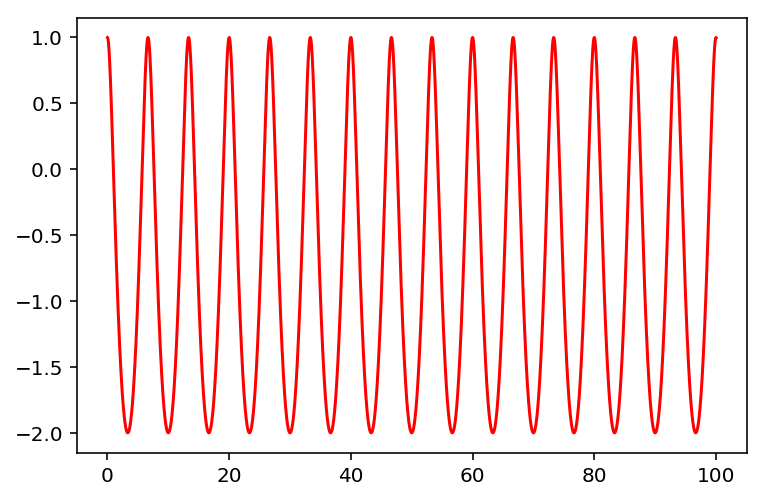

In [8]:
    plt.plot(xt,yt,'r-')
    plt.xlim(-3,2)
    plt.ylim(-2,2)
    plt.plot(0,0,'*',mfc='w',ms=10)
    #plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
    plt.plot(tt,xt, 'r-')
    plt.show()

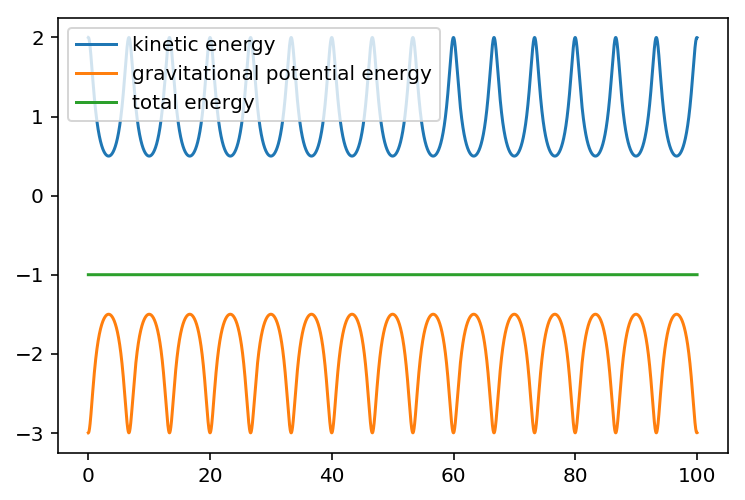

In [9]:
plt.plot(tt,kint, label = 'kinetic energy')
plt.plot(tt,pott, label = 'gravitational potential energy')
plt.plot(tt,et, label = 'total energy')
plt.legend()
plt.show()